### Lab 6 Timeseries Analysis

In this lab, you will work with timeseries data. We will use the basic Python library,the statsmodel libary for statistical computations (https://github.com/statsmodels/statsmodels/) and the tslearn library (https://tslearn.readthedocs.io/en/stable/). 

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.set_option("display.max_columns",100)
#in collaboration with Julia Anderberg

## Data overview

This dataset contains information on the quality of the air as measured by air quallity instruments for 2 years.


In [75]:
data= pd.read_csv('air_quality_stats.csv')
data

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.600,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.300,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.900,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.000,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.150,59.575001,0.788794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,2005-04-04,10:00:00,3.1,1314.25,-200,13.529605,1101.25,471.7,538.50,189.8,1374.25,1728.50,21.850,29.250000,0.756824
9353,2005-04-04,11:00:00,2.4,1162.50,-200,11.355157,1027.00,353.3,603.75,179.2,1263.50,1269.00,24.325,23.725000,0.711864
9354,2005-04-04,12:00:00,2.4,1142.00,-200,12.374538,1062.50,293.0,603.25,174.7,1240.75,1092.00,26.900,18.350000,0.640649
9355,2005-04-04,13:00:00,2.1,1002.50,-200,9.547187,960.50,234.5,701.50,155.7,1041.00,769.75,28.325,13.550000,0.513866


In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   int64  
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
dtypes: float64(12), int64(1), object(2)
memory usage: 1.1+ MB


<div class='alert alert-block alert-success' style="font-weight:bolder">

### Task 1


### 1: Change the Date column to a pandas date-time object and set the date column as the index of your dataframe.

  


</div>

In [98]:
#Please implement Task 1a here
data['DateTime'] = pd.to_datetime(data['Date'] + ' ' + data['Time'], infer_datetime_format=True)
data.set_index('DateTime', drop=True, inplace=True)
data.drop(['Date', 'Time'], axis=1, inplace=True)
data = data.asfreq('D')
data

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
DateTime,,,,,,,,,,,,,
2004-03-10 18:00:00,2.6,1360.000000,150,11.881723,1045.500000,166.0,1056.250000,113.0,1692.000000,1267.500000,13.600000,48.875001,0.757754
2004-03-11 18:00:00,4.8,1580.750000,307,20.799217,1318.500000,281.0,798.500000,151.0,2083.000000,1408.500000,10.350000,64.174999,0.806544
2004-03-12 18:00:00,3.9,1509.500000,233,19.290975,1276.500000,206.0,812.250000,149.0,1909.750000,1409.500000,15.150000,39.550000,0.676627
2004-03-13 18:00:00,3.2,1472.750000,191,15.452210,1162.750000,227.0,830.500000,148.0,1779.000000,1394.750000,16.100000,41.025000,0.745131
2004-03-14 18:00:00,2.5,1477.750000,122,12.163323,1055.250000,160.0,929.250000,121.0,1670.750000,1262.250000,19.650000,36.700000,0.830706
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2005-03-30 18:00:00,3.4,1303.750000,-200,17.052945,1211.500000,444.2,475.750000,182.6,1584.500000,1383.250000,21.525000,39.074999,0.991383
2005-03-31 18:00:00,2.1,1083.500000,-200,7.200154,865.500000,203.9,681.750000,124.0,1219.000000,778.250000,19.950000,38.925000,0.897392
2005-04-01 18:00:00,1.6,928.000000,-200,5.544912,790.250000,230.7,812.250000,153.6,951.000000,608.750000,17.050000,25.325000,0.488141



 ### Timeseries Components

A timeseries signal is composed of the trend, seasonality, level and the presence of outliers.

<div class='alert alert-block alert-success' style="font-weight:bolder">

### Task 2

### 2a: Plot the feature 'NOx(GT)' per date. Use visual inspection on the timeseries generated and give your opinion on the Level (constant variance or non-constant variance), Trend, Seasonality, presence of outliers.
### 2b: Plot the feature 'PT08.S1(CO)' per date. Use visual inspection on the timeseries generated and give your opinion on the Level (constant variance or non-constant variance), Trend, Seasonality, presence of outliers.

  


</div>

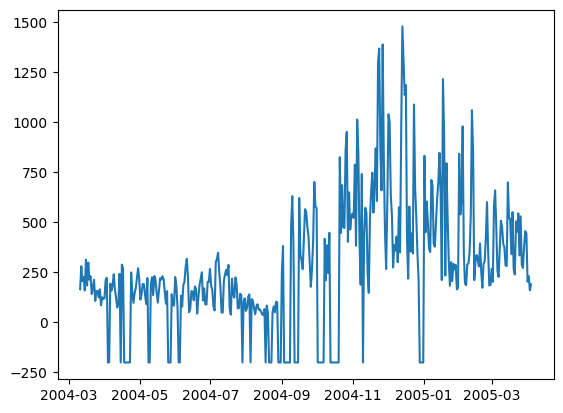

In [79]:
#Please implement Task 2a here
try:
    sns.lineplot(x=data.index, y=data['NOx(GT)'])
except TypeError:
    pass
# Variance seems to increase during the winter, the trend is stable during spring and summer but increases by the end of the year
# the winter has a higher average value and there are outliers probably errors at -200

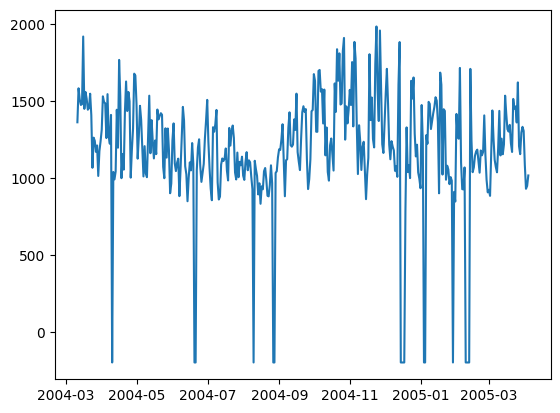

In [80]:
#Please implemnt Task 2b here
try:
    sns.lineplot(x=data.index, y=data['PT08.S1(CO)'])
except TypeError:
    pass
# Seems to have higher variance in the winter and some outliers around -200, otherwise no seasonality and the trend is pretty stable

## Seasonal Decomposition

Seasonal decomposition is based on the concept that a timeseries signal is made up of several components added or multiplied together. These underlying components are usually the trend, seasonality and residuals. Seasonal decomposition helps us to better understand the underlying patterns in a timeseries signal.

##### Additive: y(t) = Trend + Seasonality + Residuals
##### Multiplicative: y(t) = Trend * Seasonality * Residuals

The additive model is applied in seasonal decomposition when the seasonal variation remains relatively stable over time, whereas the multiplicative model is utilized when the seasonal variation escalates as time progresses.

<div class='alert alert-block alert-success' style="font-weight:bolder">

### Task 3

### 3a: Use Seasonal Decomposition to decompose the signals you plotted in Task 2. You are to determine whether this is multiplicative or additive model.
    
### 3b:Were your assumptions on the trend and seasonality from Task 2 correct?

</div>

Text(0.5, 1.0, 'PT08.S1(CO) Seasonal')

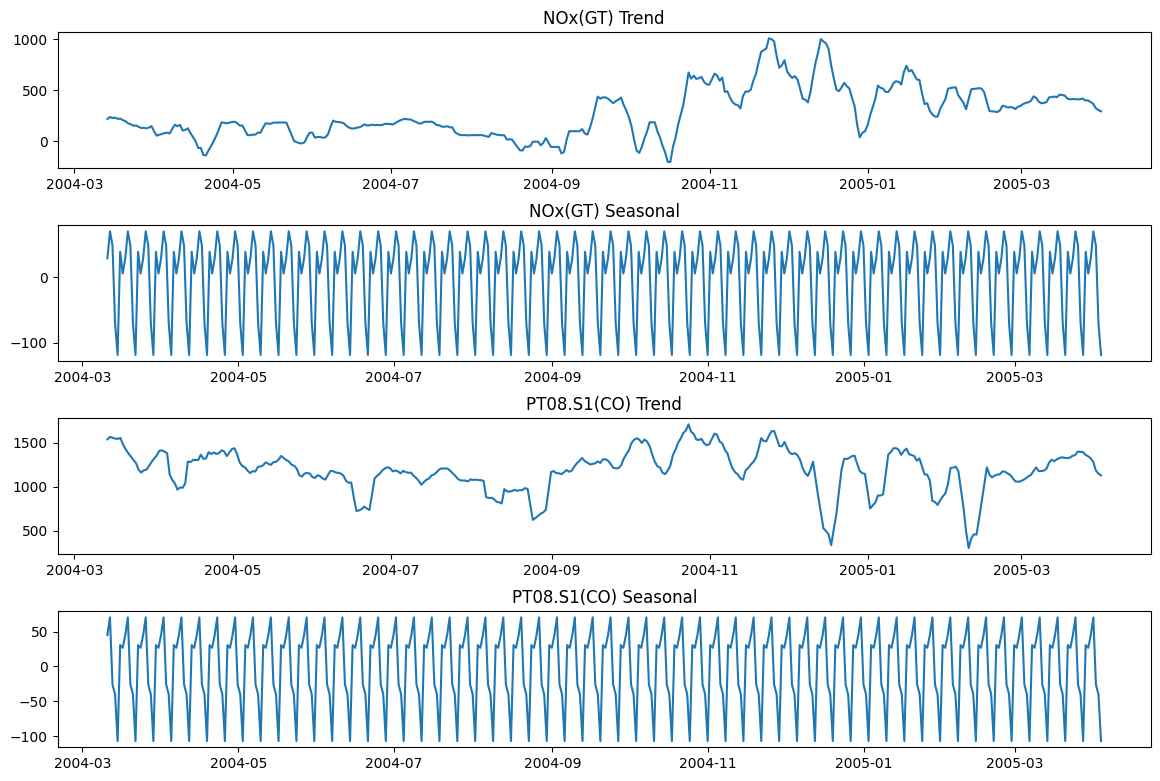

In [139]:
#Please implement Task 3a here
from statsmodels.tsa.seasonal import seasonal_decompose
nox = data['NOx(GT)']
pt08 = data['PT08.S1(CO)']
res_nox = seasonal_decompose(nox)
res_pt08 = seasonal_decompose(pt08)
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12,8))
fig.tight_layout(pad=2)
ax1.plot(res_nox.trend)
ax1.set_title('NOx(GT) Trend')
ax2.plot(res_nox.seasonal)
ax2.set_title('NOx(GT) Seasonal')
ax3.plot(res_pt08.trend)
ax3.set_title('PT08.S1(CO) Trend')
ax4.plot(res_pt08.seasonal)
ax4.set_title('PT08.S1(CO) Seasonal')
#these are both additive models, as the seasonality remains steady over time

# Please answer Task 3b here
The trend was expected but the seasonality was much more frequent than imagined

## Stationarity Test using the Augmented Dickey-Fuller (ADF) Test

The ADF test is commonly used to check for stationarity in a timeseries. A stationary time series is one in which its statistical characteristics, including mean, variance, covariance, and standard deviation, remain constant over time.

<div class='alert alert-block alert-success' style="font-weight:bolder">

### Task 4

### 4: Use the Augmented Dickey-Fuller test to determine whether the two time series signals are stationary or not. Report the p_value obtained for each of the signals
  


</div>

In [83]:
#Please implement Task 4 here
from statsmodels.tsa.stattools import adfuller

result_nox = adfuller(nox)
result_pt08 = adfuller(pt08)
print('P-value NOx(GT): ', result_nox[1])
print('P-value PT08.S1(CO): ', result_pt08[1])

#Definately stationary

P-value NOx(GT):  0.09259295657526823
P-value PT08.S1(CO):  1.6361250443880158e-18


### Forecasting a timeseries

Forecasting a timeseries involves making predictions on future values. The different types of models for forecasting timeseries data include: 

##### Statistical Methods include Exponential Smoothing, AR, MA, ARIMA, SARIMA, ARMA,
##### State-space models include Kalman filter, HMMs, 
##### Deep learning models include RNNs, CNNs and LSTMs.

<div class='alert alert-block alert-success' style="font-weight:bolder">

### Task 5

### 5: Forecast the values of the PT08.S1(CO) variable for the next 3 months from 2005-04-04. Use two different methods of your choice. Plot the predicitions and compare the predictions made. Which one is better?.


</div>

91


Text(0.5, 1.0, 'HMM Prediction')

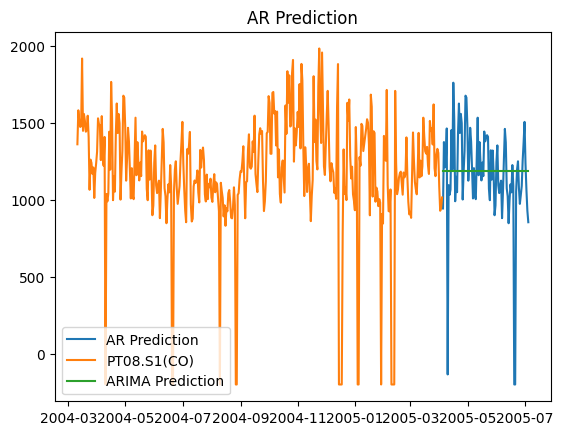

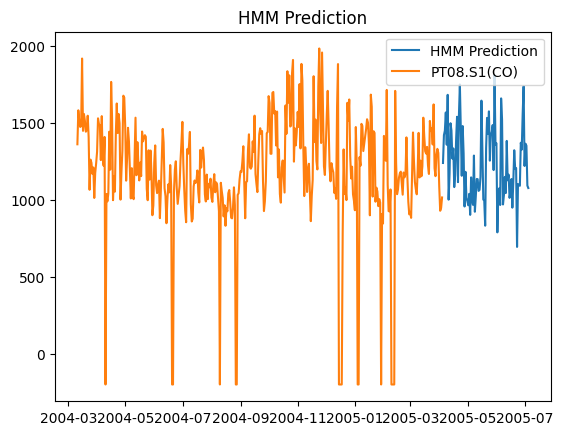

In [222]:
#Please implement Task 5 here
#AR
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA
from hmmlearn import hmm
start = pd.to_datetime('2005-04-04 18:00:00')
end = pd.to_datetime('2005-07-04 18:00:00')
daterange = pd.date_range(start=start, end=end, freq='D')
dates = (end - start).days
print(dates)
res = AutoReg(pt08, lags=4, seasonal=True, period=365).fit()
pt08_predict_AR = res.predict(start, end, dynamic=True)

res = ARIMA(pt08, order=(0,0,0), freq='D').fit()
pt08_predict_ARIMA = res.predict(start, end, dynamic=True)

res = hmm.GaussianHMM(n_components=4).fit(pt08.values.reshape(-1, 1))
pt08_predict_HMM = res.sample(n_samples=dates+1)
pt08_predict_HMM = pt08_predict_HMM[0].reshape(1,-1)[0]

plt.plot(pt08_predict_AR, label = 'AR Prediction')
plt.plot(pt08, label = 'PT08.S1(CO)')
plt.plot(pt08_predict_ARIMA, label = 'ARIMA Prediction')
plt.legend()
plt.title('AR Prediction')
plt.figure()
plt.plot(daterange, pt08_predict_HMM, label = 'HMM Prediction')
plt.plot(pt08, label = 'PT08.S1(CO)')
plt.legend()
plt.title('HMM Prediction')
#AR works best, clearly

### Timeseries Clustering

In timeseries clustering, our aim is to find similarities between the datapoints in our series. This is an important tool when patterns are not visible by visual inspection. Dynamic Time Warping helps us achieves this by measuring the dissimilarity or warping distance between data points in a time series. Unlike Euclidean distance, DTW handles potential temporal shifts,or  stretches between the data points, making it effective in capturing the true similarity between sequences with different temporal behaviors.


<div class='alert alert-block alert-success' style="font-weight:bolder">

### Task 6

### Cluster the data with timeseries Kmeans and Dynamic Time Warping. Plot the clustered data and show the cluster centers.
  
Hint: The tslearn library has a timeseries clustering method

</div>

(2, 390, 1)
Distances for cluster0 is :[3442.5918832732855, 4429.101859213948, 3408.125098078466, 3797.5968187099766, 3320.183349822974, 4150.217314176018, 4690.984875018604, 4935.12804547473]
Distances for cluster1 is :[4517.378989881237, 3648.6103603293254, 4101.490833886283, 3072.9317179693103, 3923.368224140837]


Text(0.5, 1.0, 'Dynamic Time Warping Clustering')

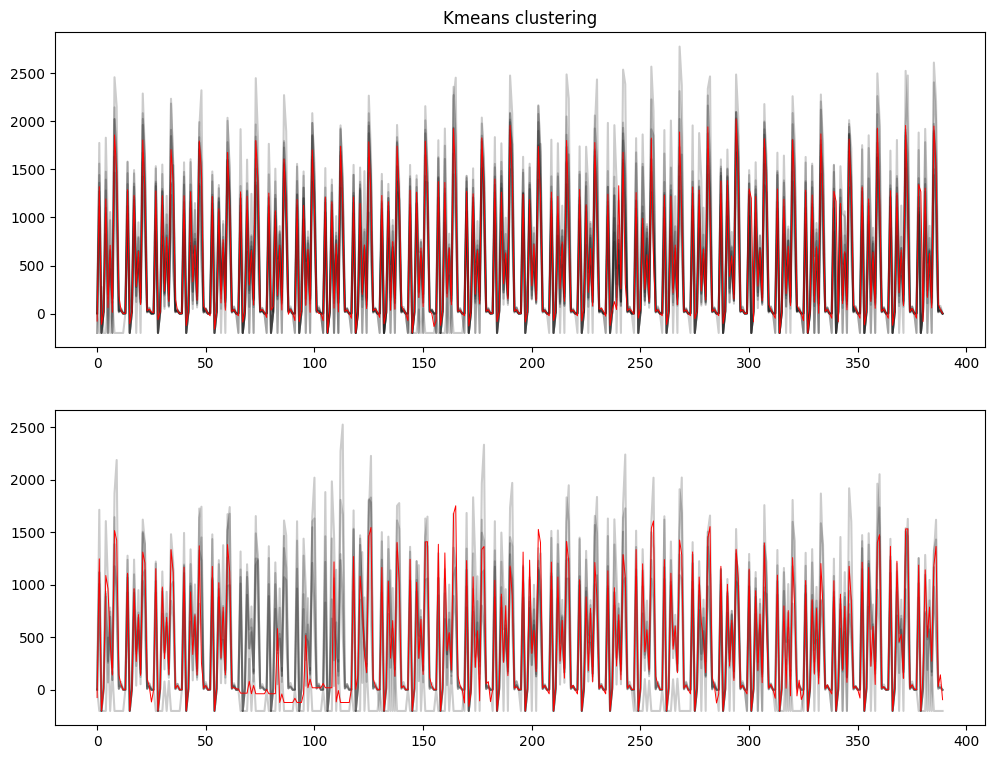

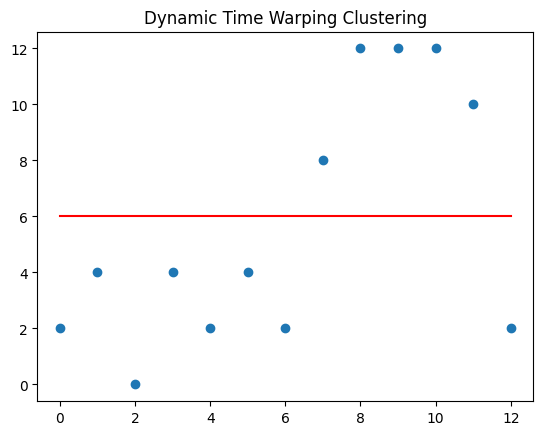

In [240]:
#Please implement Task 6 here
from tslearn.clustering import TimeSeriesKMeans
from tslearn.metrics import dtw
from tslearn.barycenters import softdtw_barycenter

kmeans_data = data.to_numpy()
kmeans_data = np.reshape(kmeans_data, (13, 390, 1))
#print(kmeans_data)

kmeans = TimeSeriesKMeans(n_clusters=2, metric='dtw')
y_pred = kmeans.fit_predict(kmeans_data)
print(kmeans.cluster_centers_.shape)
plt.figure(figsize=(12,9))
for i in range(2):
    plt.subplot(2, 1, i + 1)
    for j in kmeans_data[y_pred == i]:
        plt.plot(j, "k", alpha=.2)
    plt.plot(kmeans.cluster_centers_[i], "r", linewidth=.7)
    distances = [dtw(kmeans.cluster_centers_[i], j) for j in kmeans_data[y_pred == i]]
    print(f'Distances for cluster{i} is :{distances}')
    if i == 0:
        plt.title("Kmeans clustering")

dtw_score = np.zeros((13,13))
for i in range(13):
    for j in range(13):
        dtw_score[i,j] = dtw(kmeans_data[i], kmeans_data[j])
        if dtw_score[i,j] == 0:
            dtw_score[i,j] = np.inf
pairs = np.array(list(enumerate(np.argmin(dtw_score, axis=0))))
plt.figure()
plt.scatter(pairs[:,0], pairs[:,1])
line = [list(range(13)), [6]*13]

plt.plot(line[0], line[1], 'r')
plt.title('Dynamic Time Warping Clustering')


With Dynamic Time Warping we get distance measures of our time series if we plot the index of the series with minimum distance for each time series we se we can get two clusters of time series that have similar shapes.

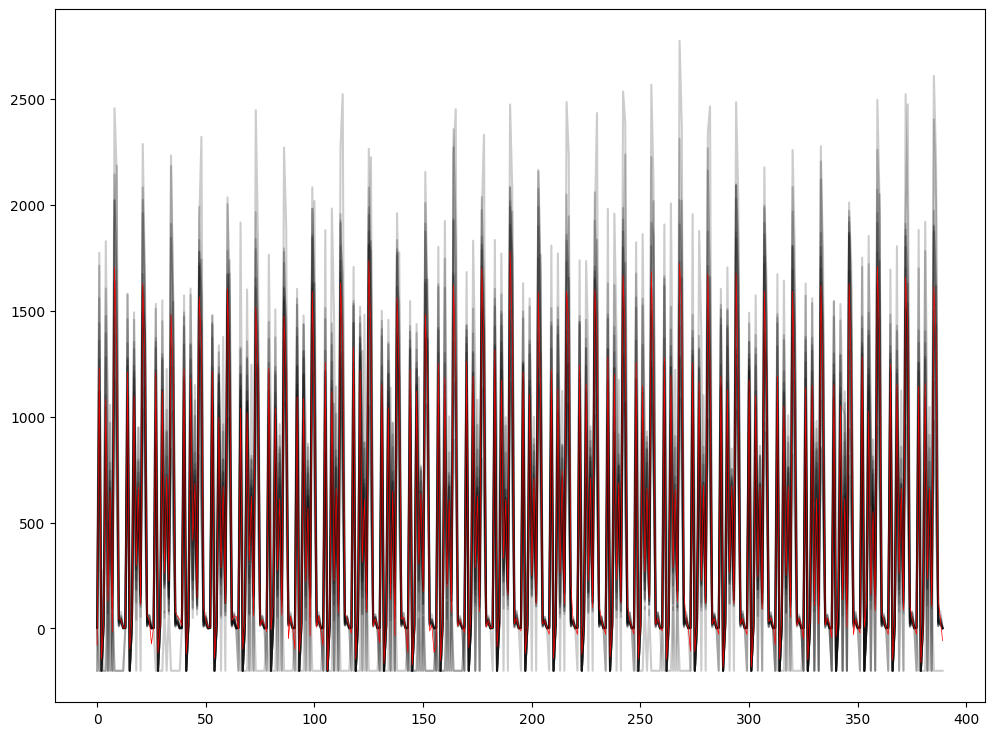

In [235]:
plt.figure(figsize=(12,9))
barycenter = softdtw_barycenter(kmeans_data, gamma=1., max_iter=50, tol=1e-3)
for series in kmeans_data:
    plt.plot(series.ravel(), "k-", alpha=.2)
# plot the given barycenter of them
plt.plot(barycenter.ravel(), "r-", linewidth=.5)